### **FIFA 2021 Messy Dataset**

**Import Relevant Libraries**

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from IPython.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from tabulate import tabulate
from scipy.stats import zscore, pearsonr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import re

In [217]:
data = pd.read_csv(r"D:\Data Analytics\PortfolioProjects\fifa-2021.csv", low_memory=False)
df = data.copy()

In [218]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,High,Medium,5 ★,91,85,86,94,36,59,595


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [220]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [221]:
def apply_table_style(df):
    table_style = [
        {'selector': 'thead th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]},
        {'selector': 'tbody td', 'props': [('padding', '8px'), ('text-align', 'center')]},
        {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]},
        {'selector': 'th', 'props': [('border', '1px solid #ddd')]},
        {'selector': 'td', 'props': [('border', '1px solid #ddd')]},
        {'selector': 'tbody tr:nth-child(odd)', 'props': [('background-color', 'transparent')]},
        {'selector': 'tbody tr:hover', 'props': [('background-color', 'transparent')]}
    ] 
    return df.style.set_table_styles(table_style)

### **The dataset is extremely messy. First, lets do some data cleaning**

**Dropping the unnecessary Columns**

In [222]:
df.drop(columns = ['photoUrl','playerUrl','Loan Date End','Name'], inplace = True)

In [223]:
df.rename(columns={'LongName': 'FullName', '↓OVA': 'Overall Rating', 'POT': 'Potential Rating'}, inplace=True)

**Converting Height Column into Numeric and all data into cm**

In [224]:
def convert_height(height):
    feet_inches_pattern = re.compile(r'(\d)\'(\d+)"')

    feet_inches_match = feet_inches_pattern.match(height)
    if feet_inches_match:
        feet = int(feet_inches_match.group(1))
        inches = int(feet_inches_match.group(2))
        cm = feet * 30.48 + inches * 2.54
        return cm

    cm_pattern = re.compile(r'(\d+)cm')
    cm_match = cm_pattern.match(height)
    if cm_match:
        return int(cm_match.group(1))

    try:
        return float(height)
    except ValueError:
        return None

df['Height'] = df['Height'].apply(convert_height)

In [225]:
df['Height'].head()

0    170.0
1    187.0
2    188.0
3    181.0
4    175.0
Name: Height, dtype: float64

**Converting Weight Column into Numeric and all the  data into kg**

In [226]:
def convert_weight(weight):
    kg_pattern = re.compile(r'(\d+)kg')
    kg_match = kg_pattern.match(weight)
    if kg_match:
        return int(kg_match.group(1))

    lbs_pattern = re.compile(r'(\d+)lbs')
    lbs_match = lbs_pattern.match(weight)
    if lbs_match:
        lbs = int(lbs_match.group(1))
        kg = lbs * 0.453592  
        return round(kg, 2)  

    try:
        return float(weight)
    except ValueError:
        return None

df['Weight'] = df['Weight'].apply(convert_weight)

In [227]:
df['Weight'].head()

0    72.0
1    83.0
2    87.0
3    70.0
4    68.0
Name: Weight, dtype: float64

**Remove the unnecessary newline characters from all columns that have them.**

In [228]:
def remove_newlines(text):
    if isinstance(text, str):
        return text.replace('\n', ' ')
    return text

df = df.applymap(remove_newlines)

**Convert 'Value', 'Wage' and 'Clause' format to numeric**

In [229]:
def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Value'] = df['Value'].apply(convert_value)

def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Wage'] = df['Wage'].apply(convert_value)

def convert_value(value):
    if value.endswith('M'):
        return float(value[1:-1]) * 1000000
    elif value.endswith('K'):
        return float(value[1:-1]) * 1000
    elif value == '€0':
        return 0
    else:
        return float(value[1:])

df['Release Clause'] = df['Release Clause'].apply(convert_value)

In [230]:
print(df['Value'].head())
print(df['Wage'].head())
print(df['Release Clause'].head())

0    103500000.0
1     63000000.0
2    120000000.0
3    129000000.0
4    132000000.0
Name: Value, dtype: float64
0    560000.0
1    220000.0
2    125000.0
3    370000.0
4    270000.0
Name: Wage, dtype: float64
0    138400000.0
1     75900000.0
2    159400000.0
3    161000000.0
4    166500000.0
Name: Release Clause, dtype: float64


**Find columns with 'star' characters**

In [231]:
columns_with_stars = []
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, str) and '*' in x).any():
        columns_with_stars.append(col)

print("Columns with star characters:", columns_with_stars)

Columns with star characters: []


**Hence, There are not any.**

**Convert 'Hits' column to float64 and replace nulls with zeros**

In [232]:
df['Hits'] = pd.to_numeric(df['Hits'], errors='coerce').fillna(0)

## **Data Visualization/Exploration**

**Separating the Joined Column into Year, Month and Day Columns**

In [233]:
df['Joined'] = pd.to_datetime(df['Joined'])

df['Year'] = df['Joined'].dt.year
df['Month'] = df['Joined'].dt.month
df['Day'] = df['Joined'].dt.day

columns_to_display = ['Joined', 'Day', 'Month', 'Year']
formatted_df = df[columns_to_display].copy()

formatted_df['Joined'] = formatted_df['Joined'].dt.strftime('%Y-%m-%d')

print(formatted_df.head().to_string(index=False))

    Joined  Day  Month  Year
2004-07-01    1      7  2004
2018-07-10   10      7  2018
2014-07-16   16      7  2014
2015-08-30   30      8  2015
2017-08-03    3      8  2017


#### **Checking All the players that have been playing for more than 15 years.**

In [234]:
df['Joined'] = pd.to_datetime(df['Joined'])
df['YearsOfService'] = (datetime.now() - df['Joined']).dt.days / 365.25

In [235]:
players_over_15_years = df[df['YearsOfService'] > 15]

longest_serving_players = df.sort_values(by='YearsOfService', ascending=False)

columns_to_display = ['FullName', 'Nationality', 'Joined', 'YearsOfService', 'Overall Rating']
top_longest_serving_players = longest_serving_players[columns_to_display].head(10)

top_longest_serving_players['YearsOfService'] = top_longest_serving_players['YearsOfService'].apply(lambda x: f'{x:.0f}')
top_longest_serving_players['Joined'] = top_longest_serving_players['Joined'].dt.strftime('%Y-%m-%d')

top_longest_serving_players.reset_index(drop=True, inplace=True)

display(HTML("<h4 style='font-weight: bold; font-size: 20px;'>Top 10 Players with Longest Service:</h4>"))

styled_table = apply_table_style(top_longest_serving_players)
display(styled_table)
num_players_over_15_years = players_over_15_years.shape[0]

display(HTML(f"<h4 style='color: orange;'>Number of Players with More Than 15 Years of Service: <span style='color: red;'>{num_players_over_15_years}</span></h4>"))

,FullName,Nationality,Joined,YearsOfService,Overall Rating
0,Hitoshi Sogahata,Japan,1998-01-01,27,65
1,Kwang Suk Kim,Korea Republic,2002-01-01,23,70
2,Igor Akinfeev,Russia,2002-01-01,23,80
3,Dean Lewington,England,2002-08-01,23,65
4,Kengo Nakamura,Japan,2003-01-01,22,68
5,Hidekazu Otani,Japan,2003-01-01,22,64
6,Mark McNulty,Republic of Ireland,2003-01-01,22,60
7,David Zibung,Switzerland,2003-07-01,22,61
8,Per Karlsson,Sweden,2003-07-01,22,71
9,Matt Bloomfield,England,2003-12-22,21,64


In [236]:
nationality_counts = players_over_15_years['Nationality'].value_counts().head(10)
display(HTML("<h4 style='font-weight: bold; font-size: 20px;'>Top 10 Nationalities with Long-Serving Players:</h4>"))

styled_nationality_table = apply_table_style(nationality_counts.head(10).reset_index().rename(columns={'index': 'Nationality', 'Nationality': 'Count'}))
display(styled_nationality_table)

,Nationality,Count
0,Japan,20
1,China PR,12
2,Korea Republic,10
3,Spain,9
4,Germany,8
5,Scotland,7
6,France,7
7,Russia,6
8,Ecuador,6
9,Austria,6


**Asian countries like Japan, China, Korea Republic dominate the list, suggesting a focus on developing long-term careers, followed by European nations**


Average Overall Rating of players with >15 years: 69.73
Average Overall Rating of players with <=15 years: 65.68


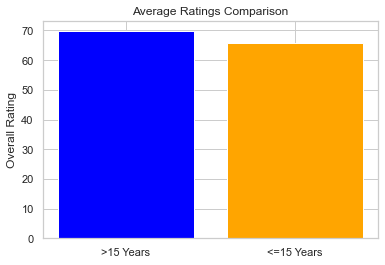

In [237]:
long_serving_avg_rating = players_over_15_years['Overall Rating'].mean()
other_players_avg_rating = df[df['YearsOfService'] <= 15]['Overall Rating'].mean()
print(f"\nAverage Overall Rating of players with >15 years: {long_serving_avg_rating:.2f}")
print(f"Average Overall Rating of players with <=15 years: {other_players_avg_rating:.2f}")

labels = ['>15 Years', '<=15 Years']
values = [long_serving_avg_rating, other_players_avg_rating]

plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Average Ratings Comparison')
plt.ylabel('Overall Rating')
plt.show()

**Players with more than 15 years of experience (the blue bar) have a significantly higher average rating compared to players with 15 years or less (the orange bar). This suggests that in FIFA, experience is a valuable asset and is reflected in the overall rating of players.**

#### **TOP 10 Players by Market Value and Potential Rating**

In [238]:
top_players_by_value = df[['FullName', 'Value', 'Potential Rating']].sort_values(by='Value', ascending=False).head(10)
top_players_by_potential = df[['FullName', 'Value', 'Potential Rating']].sort_values(by='Potential Rating', ascending=False).head(10)

top_players_by_value.reset_index(drop=True, inplace=True)
top_players_by_potential.reset_index(drop=True, inplace=True)

top_players_by_value['Value'] = top_players_by_value['Value'].apply(lambda x: f'{x:,.0f}')

styled_value_table = apply_table_style(top_players_by_value[['FullName', 'Value']])
styled_potential_table = apply_table_style(top_players_by_potential[['FullName', 'Potential Rating']])
display(styled_value_table)
display(styled_potential_table)

,FullName,Value
0,Kylian Mbappé,"185,500,000"
1,Neymar da Silva Santos Jr.,"132,000,000"
2,Kevin De Bruyne,"129,000,000"
3,Jadon Sancho,"124,000,000"
4,Kai Havertz,"121,000,000"
5,Mohamed Salah,"120,500,000"
6,Sadio Mané,"120,500,000"
7,Jan Oblak,"120,000,000"
8,Raheem Sterling,"114,500,000"
9,Trent Alexander-Arnold,"114,000,000"


,FullName,Potential Rating
0,Kylian Mbappé,95
1,Lionel Messi,93
2,João Félix Sequeira,93
3,Kai Havertz,93
4,Jadon Sancho,93
5,Marc-André ter Stegen,93
6,Vinícius José de Oliveira Júnior,93
7,Jan Oblak,93
8,Trent Alexander-Arnold,92
9,Gianluigi Donnarumma,92


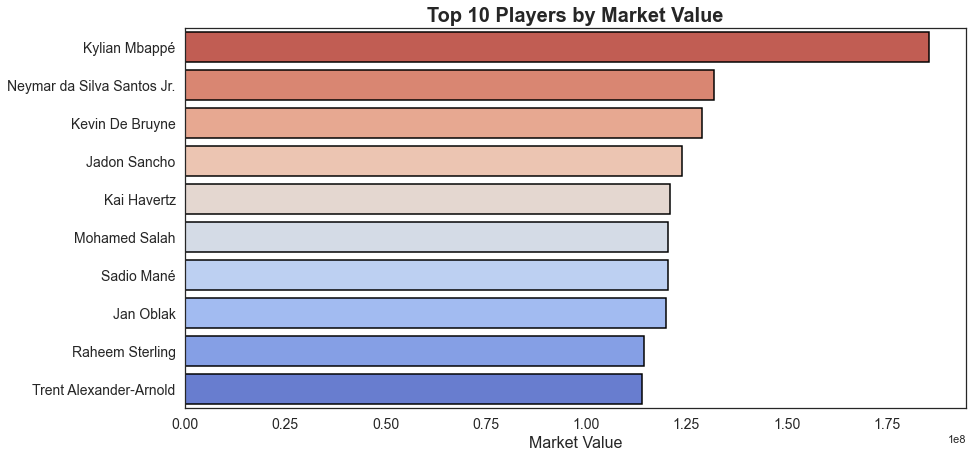

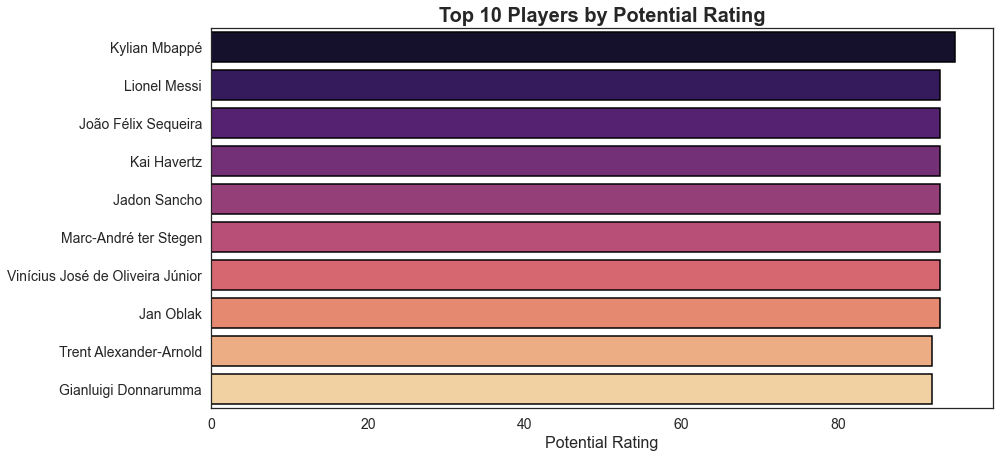

In [239]:
sns.set_theme(style="white")

top_players_by_value = df[['FullName', 'Value', 'Potential Rating']].sort_values(by='Value', ascending=False).head(10)
top_players_by_potential = df[['FullName', 'Value', 'Potential Rating']].sort_values(by='Potential Rating', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='Value', y='FullName', data=top_players_by_value, palette='coolwarm_r', edgecolor='black', linewidth=1.5)
plt.title('Top 10 Players by Market Value', fontsize=20, fontweight='bold')
plt.xlabel('Market Value', fontsize=16)
plt.ylabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(x='Potential Rating', y='FullName', data=top_players_by_potential, palette='magma', edgecolor='black', linewidth=1.5)
plt.title('Top 10 Players by Potential Rating', fontsize=20, fontweight='bold')
plt.xlabel('Potential Rating', fontsize=16)
plt.ylabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**The famous Lionel Messi is no. 2 in potential rating**

#### **Age Group Analysis**

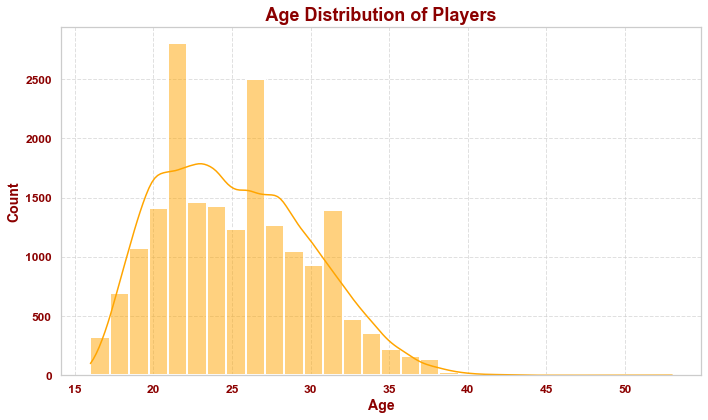

In [240]:
sns.set_theme(style="whitegrid", palette="coolwarm")

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30, color="orange", linewidth=2)

plt.title(' Age Distribution of Players ', fontsize=18, fontweight='bold', color='darkred')

plt.xlabel('Age', fontsize=14, fontweight='bold', color='darkred')
plt.ylabel('Count', fontsize=14, fontweight='bold', color='darkred')

plt.xticks(fontsize=12, fontweight='bold', color='darkred')
plt.yticks(fontsize=12, fontweight='bold', color='darkred')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**The graph shows that the majority of players are in their mid-20s, with a significant decline in the number of players as age increases, implying a focus on youth development and a relatively short average career length.**

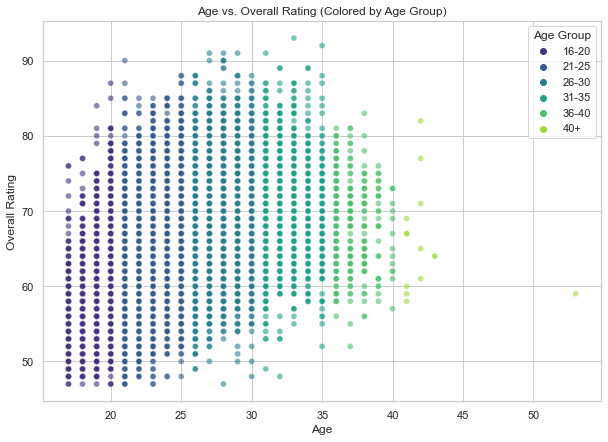


Correlation Coefficient between Age and Overall Rating: 0.47

 Age Group Descriptive Statistics 


,num_players,mean_overall_rating,min_overall_rating,max_overall_rating
Age Group,,,,
16-20,3470,59,47,87
21-25,6932,65,47,90
26-30,5745,68,47,91
31-35,2446,69,48,93
36-40,337,68,52,83
40+,14,66,58,82


In [241]:
age_bins = [16, 20, 25, 30, 35, 40, 100]  
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '40+']  
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)  

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Age', y='Overall Rating', hue='Age Group', palette='viridis', data=df, alpha=0.6)
plt.title('Age vs. Overall Rating (Colored by Age Group)')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.legend(title='Age Group', loc='upper right')
plt.grid(True)
plt.show()

correlation = df['Age'].corr(df['Overall Rating'])
print(f"\n\u001b[1m\u001b[32mCorrelation Coefficient between Age and Overall Rating:\u001b[0m \u001b[35m{correlation:.2f}\u001b[0m")

age_group_stats = df.groupby('Age Group')['Overall Rating'].agg(
    num_players='size',  
    mean_overall_rating=lambda x: round(x.mean()),  
    min_overall_rating='min',    
    max_overall_rating='max'     
)

print("\n Age Group Descriptive Statistics ")

styled_table = apply_table_style(age_group_stats)
styled_table



**Players aged 31-35 have the highest mean overall rating (69) and maximum rating (93), indicating the peak age range for overall performance.**

**Players aged 40+ show a significant decline in performance with a mean rating of 66.**

#### **Future Stars and Peak Performers**

In [242]:
underperforming_players = df[df['Potential Rating'] > df['Overall Rating']]
underperforming_players = underperforming_players[['FullName', 'Overall Rating', 'Potential Rating', 'Age']].sort_values(by='Potential Rating', ascending=False)

underperforming_players_top10 = underperforming_players.head(10)
underperforming_players_top10.reset_index(drop=True, inplace=True)

styled_table = apply_table_style(underperforming_players_top10)
styled_table

,FullName,Overall Rating,Potential Rating,Age
0,Kylian Mbappé,90,95,21
1,Jan Oblak,91,93,27
2,Jadon Sancho,87,93,20
3,Marc-André ter Stegen,90,93,28
4,João Félix Sequeira,81,93,20
5,Vinícius José de Oliveira Júnior,80,93,19
6,Kai Havertz,85,93,21
7,Gianluigi Donnarumma,85,92,21
8,Erling Haaland,84,92,19
9,Trent Alexander-Arnold,87,92,21


#### **Market Value and Overall Rating**

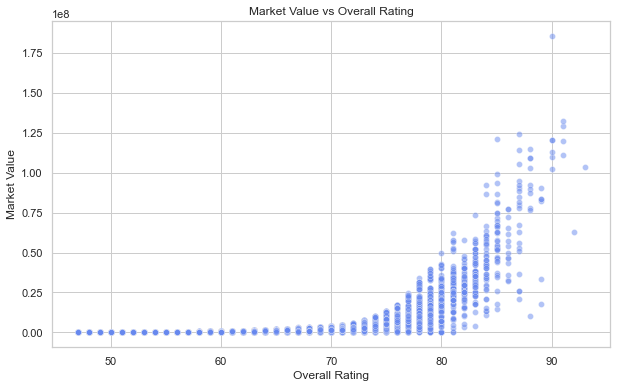

In [243]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall Rating', y='Value', data=df, alpha=0.5)
plt.title('Market Value vs Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Market Value')
plt.show()

correlation_value = df['Value'].corr(df['Overall Rating'])
display(HTML(f"<h3 style='color: #FF9800;'>Correlation Between Market Value and Overall Rating: <span style='color: #2196F3;'>{correlation_value:.2f}</span></h3>"))

In [244]:
filtered_df = df[df['Overall Rating'] > 70]

correlation_value_ovr = filtered_df['Value'].corr(filtered_df['Overall Rating'])
display(HTML(f"<h3 style='color: #FF9800;'>Correlation Between Market Value and Overall Rating (Overall Rating > 70): <span style='color: #2196F3;'>{correlation_value_ovr:.2f}</span></h3>"))

In [245]:
total_players = len(df)

players_above_70 = len(df[df['Overall Rating'] > 70])
percentage_above_70 = (players_above_70 / total_players) * 100

print(f"Percentage of players with Overall Rating > 70: {percentage_above_70:.2f}%")

high_ovr_players = df[df['Overall Rating'] > 70]
high_ovr_value_share = high_ovr_players['Value'].sum() / df['Value'].sum() * 100
print(f"Percentage of total market value held by players with OVR > 70: {high_ovr_value_share:.2f}%")

display(HTML("<p style='font-size: 17px; font-weight: bold;'>A small percentage of players with Overall Rating > 70 account for a massive share of the total market value.</p><p><span style='font-size: 17px; font-weight: bold; color: #e74c3c;'>Only 23.90%</span> of players have an Overall Rating > 70, while they hold <span style='font-size: 17px; font-weight: bold; color: #e74c3c;'>75.99%</span> of the total market value!</p>"))

Percentage of players with Overall Rating > 70: 23.90%
Percentage of total market value held by players with OVR > 70: 76.50%


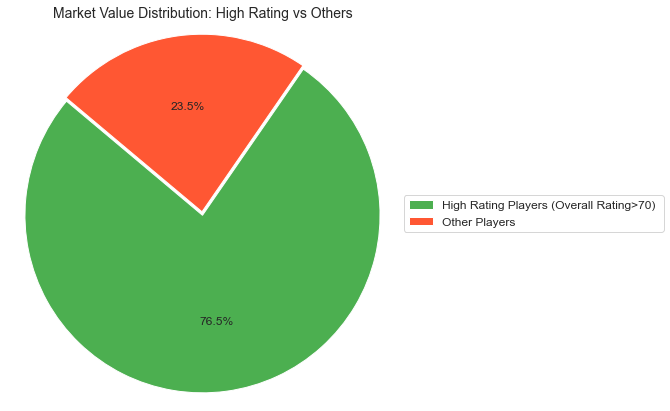

In [246]:
high_ovr_players = df[df['Overall Rating'] > 70]

total_market_value = df['Value'].sum()
high_ovr_value = high_ovr_players['Value'].sum()
other_value = total_market_value - high_ovr_value

labels = ['High Rating Players (Overall Rating>70) ', 'Other Players']
sizes = [high_ovr_value, other_value]
colors = ['#4CAF50', '#FF5733']  
explode = (0.02, 0)  

plt.figure(figsize=(7, 7))
plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
plt.title('Market Value Distribution: High Rating vs Others', fontsize=14)

plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=12)
plt.axis('equal')  
plt.show()

**This is a very important insight I discovered on random testing! Players withan Overall Rating > 70 represent only 23.90% of player population but hold 76.50% of the total market value, emphasizing the premium on elite talent!**

**The Market value is highly concentrated among top players, reflecting a significant disparity.**

**Opportunities: Hidden gems may exist among lower-rated, undervalued players.**

#### **Players Physical Attributes**

In [247]:
df['Height_Z'] = zscore(df['Height'])
df['Weight_Z'] = zscore(df['Weight'])

height_outliers = df[df['Height_Z'].abs() > 3]
weight_outliers = df[df['Weight_Z'].abs() > 3]

print(f"Number of players with Z-score > 3 in Height: {len(height_outliers)}")
print(f"Number of players with Z-score > 3 in Weight: {len(weight_outliers)}")

Number of players with Z-score > 3 in Height: 22
Number of players with Z-score > 3 in Weight: 54


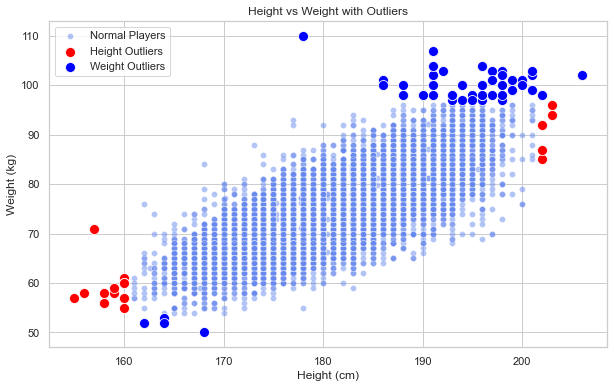

In [248]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Height', y='Weight', label='Normal Players', alpha=0.5)

sns.scatterplot(data=height_outliers, x='Height', y='Weight', color='red', label='Height Outliers', s=100)

sns.scatterplot(data=weight_outliers, x='Height', y='Weight', color='blue', label='Weight Outliers', s=100)

plt.title('Height vs Weight with Outliers')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.show()

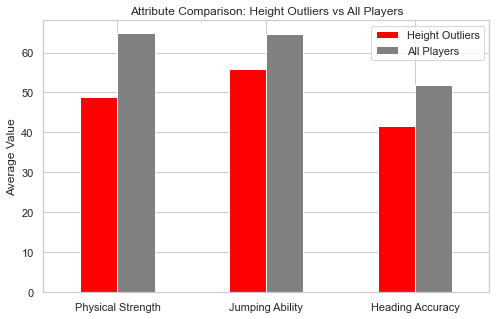

In [249]:
height_outliers_mean = height_outliers[['Strength', 'Jumping', 'Heading Accuracy']].mean()
all_players_mean = df[['Strength', 'Jumping', 'Heading Accuracy']].mean()

comparison = pd.DataFrame({'Height Outliers': height_outliers_mean, 'All Players': all_players_mean})

comparison.plot(kind='bar', figsize=(8, 5), color=['red', 'grey'])
plt.xticks(ticks=range(3), labels=['Physical Strength', 'Jumping Ability', 'Heading Accuracy'], rotation=0)
plt.title('Attribute Comparison: Height Outliers vs All Players')
plt.ylabel('Average Value')
plt.show()

                   BMI  Acceleration   Stamina  Strength
BMI           1.000000     -0.067292  0.024993  0.302675
Acceleration -0.067292      1.000000  0.609475 -0.153931
Stamina       0.024993      0.609475  1.000000  0.276463
Strength      0.302675     -0.153931  0.276463  1.000000


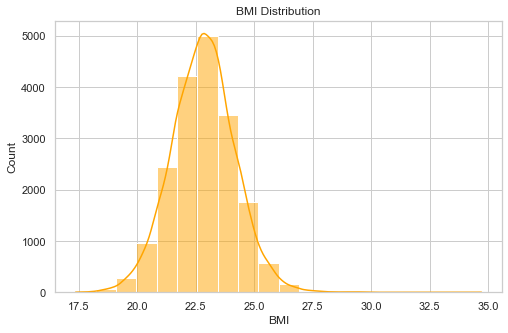

In [250]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)

correlation_bmi = df[['BMI', 'Acceleration', 'Stamina', 'Strength']].corr()
print(correlation_bmi)

plt.figure(figsize=(8, 5))
sns.histplot(df['BMI'], kde=True, bins=20, color='orange')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

In [251]:
avg_height_weight = df.groupby('Best Position')[['Height', 'Weight']].mean().round(0).astype(int).sort_values(by='Height', ascending=False)
styled_table = apply_table_style(avg_height_weight)
styled_table

,Height,Weight
Best Position,,
GK,188,82
CB,186,79
ST,183,77
CDM,180,74
CM,179,73
LB,178,72
LWB,178,71
RB,178,72
CAM,177,70


**Goalkeepers (GK) are Tallest (188cm) and heaviest (82kg) for aerial and goal coverage.**

**Central Defenders (CB) are Tall (186cm) for heading and aerial duels.**

**Strikers (ST) are Tall (183cm) but lighter, balancing physical presence and speed.**

**Midfielders (CM, CDM, CAM) are Shorter and lighter, focusing on agility and stamina.**

**Full-backs and Wingers (LB, RB, LWB, RWB, RW, LW) are also Shorter and lighter, prioritizing speed and agility for quick movements.**

#### **Players Wage-Vaue Analysis**

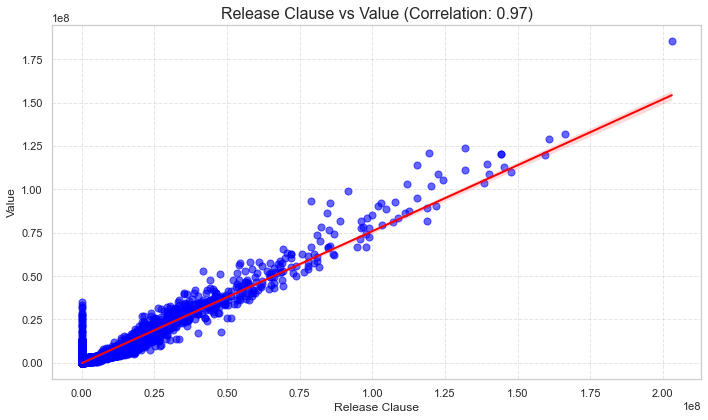

In [252]:
corr, _ = pearsonr(df['Release Clause'].dropna(), df['Value'].dropna())

plt.figure(figsize=(10, 6))
sns.regplot(x='Release Clause', y='Value', data=df, scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})

plt.title(f'Release Clause vs Value (Correlation: {corr:.2f})', fontsize=16)
plt.xlabel('Release Clause', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

**The scatter plot illustrates a very strong positive correlation (0.97) between a player's Release Clause and their market Value. This indicates a clear trend where players with higher release clauses, likely due to their superior skills and potential, are valued more highly in the transfer market.**

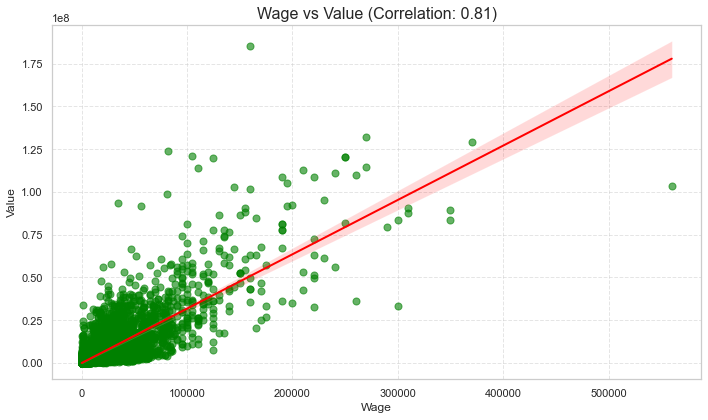

In [253]:
corr, _ = pearsonr(df['Wage'].dropna(), df['Value'].dropna())

plt.figure(figsize=(10, 6))
sns.regplot(
    x='Wage',
    y='Value',
    data=df,
    scatter_kws={'s': 50, 'alpha': 0.6, 'color': 'green'},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title(f'Wage vs Value (Correlation: {corr:.2f})', fontsize=16)
plt.xlabel('Wage', fontsize=12)
plt.ylabel('Value', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

In [254]:
df_filtered = df[df['Value'] > 0].copy() 
df_filtered['WageToValueRatio'] = df_filtered['Wage'] / df_filtered['Value']

average_wage = df_filtered['Wage'].mean()
average_value = df_filtered['Value'].mean()
avg_ratio = average_wage / average_value

print(f"Average Wage: {average_wage:.0f}")
print(f"Average Value: {average_value:.0f}")
print(f"\nAverage WageToValueRatio: {avg_ratio:.6f}")
print("Highest Wage-to-Value Ratio:", df_filtered['WageToValueRatio'].max())
print("Lowest Wage-to-Value Ratio:", df_filtered['WageToValueRatio'].min())

Average Wage: 9210
Average Value: 2902997

Average WageToValueRatio: 0.003173
Highest Wage-to-Value Ratio: 0.12777777777777777
Lowest Wage-to-Value Ratio: 2.9411764705882354e-05


In [255]:
most_overpaid = df_filtered.sort_values(by='WageToValueRatio', ascending=False).head(10)
most_underpaid = df_filtered.sort_values(by='WageToValueRatio', ascending=True).head(10)

most_overpaid['Wage'] = most_overpaid['Wage'].round(0).astype(int)
most_overpaid['Value'] = most_overpaid['Value'].round(0).astype(int)
most_underpaid['Wage'] = most_underpaid['Wage'].round(0).astype(int)
most_underpaid['Value'] = most_underpaid['Value'].round(0).astype(int)

most_overpaid.reset_index(drop=True, inplace=True)
most_overpaid.index += 1
most_underpaid.reset_index(drop=True, inplace=True)
most_underpaid.index += 1

styled_undervalue_table = apply_table_style(most_overpaid[['FullName', 'Wage', 'Value', 'WageToValueRatio', 'Overall Rating']])
styled_overvalue_table = apply_table_style(most_underpaid[['FullName', 'Wage', 'Value', 'WageToValueRatio', 'Overall Rating']])

display(HTML("<h5 style='font-weight: bold; font-size: 20px;'>Most Overpaid Players:</h3>"))
display(styled_undervalue_table)

display(HTML("<h5 style='font-weight: bold; font-size: 20px;'>Most Underpaid Players:</h3>"))
display(styled_overvalue_table)

,FullName,Wage,Value,WageToValueRatio,Overall Rating
1,Lee Grant,23000,180000,0.127778,70
2,Eldin Jakupović,9000,90000,0.100000,66
3,Rene Gilmartin,5000,50000,0.100000,57
4,Lewis Price,3000,35000,0.085714,61
5,Daniele Padelli,44000,525000,0.083810,73
6,Waleed Abdullah,6000,80000,0.075000,63
7,Artem Rebrov,13000,180000,0.072222,70
8,Gary Maley,600,9000,0.066667,52
9,Wes Morgan,35000,550000,0.063636,73
10,Antonio Rosati,9000,150000,0.060000,69


,FullName,Wage,Value,WageToValueRatio,Overall Rating
1,Viktor Tsygankov,1000,34000000,0.000029,80
2,Dominik Livaković,900,24500000,0.000037,80
3,Vitaliy Mykolenko,700,16000000,0.000044,76
4,Ismaily Gonçalves dos S.,1000,22000000,0.000045,81
5,Ondřej Kolář,850,16500000,0.000052,78
6,Adam Hložek,500,9500000,0.000053,74
7,Mateus Tetê,750,12500000,0.000060,75
8,Benjamin Verbič,1000,16500000,0.000061,78
9,José Pedro Malheiro de Sá,1000,16000000,0.000063,79
10,Taras Stepanenko,1000,14500000,0.000069,79


### **Predicting FIFA Player Market Value Using Machine Learning**

In [256]:
df['z_score'] = (df['Value'] - df['Value'].mean()) / df['Value'].std()
count_gt_3 = df[df['z_score'] > 3].shape[0]
print(f"Number of entries of Value with z-score greater than 3: {count_gt_3}")

Number of entries of Value with z-score greater than 3: 367


In [257]:
features = ['Age', 'Potential Rating', 'Overall Rating', 'Wage', 'YearsOfService', 
            'PAC', 'SHO', 'DEF', 'PHY']
target = 'Value'  

df_cleaned = df.dropna(subset=features + [target]).copy()  

df_cleaned['Z_Score'] = zscore(df_cleaned['Value'])
df_cleaned = df_cleaned[df_cleaned['Z_Score'].abs() <= 3]

df_cleaned['LogValue'] = np.log1p(df_cleaned[target])

X_cleaned = df_cleaned[features]
y_cleaned = df_cleaned['LogValue']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cleaned, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=15, min_samples_split=4, min_samples_leaf=2)
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  

r2 = r2_score(np.expm1(y_test), y_pred)  
mae = mean_absolute_error(np.expm1(y_test), y_pred)  

display(HTML(f"<h3 style='color: #FF5722;'>R² Score: <span style='color: #2196F3;'>{r2:.2f}</span></h3>"))
display(HTML(f"<h3 style='color: #FF5722;'>Mean Absolute Error (MAE): <span style='color: #2196F3;'>{mae:.2f}</span></h3>"))

I initially got:

**R² Score: 0.95**

**MAE: 446,148.40**

But after some improvements, I achieved:

**R² Score: 0.98 (extremely high!)**

**MAE: 116,608.49**

So my R² Score increased by **3.23%** and MAE decreased by **73.9%**

Its because I figured out a few (367) extreme outliers (z-score>3) in the Target Column (Value) and removed them from my ML Model, Hence significantly improving results!

### **Cluster Analysis**

**PAC – Pace: SHO – Shooting: DEF – Defending: PHY – Physicality**

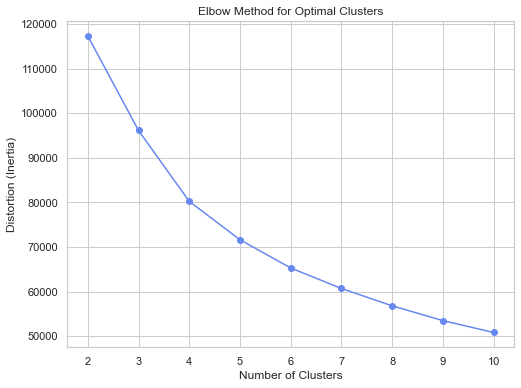

In [258]:
features = ['Overall Rating', 'Potential Rating', 'Wage', 'Value', 'PAC', 'SHO', 'DEF', 'PHY']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distortions = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6)) 
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

**The Elbow plot shows a clear "elbow" at k = 4, suggesting it's the optimal number of clusters since the distortion rate stops decreasing significantly after it. So lets use 4 clusters for our analysis.**

,Cluster,Overall Rating,Potential Rating,Wage,Value,PAC,SHO,DEF,PHY
0,0,64,69,3874,954099,61,40,62,68
1,1,72,76,16151,4730167,73,64,53,69
2,2,61,68,2466,689481,68,57,35,56
3,3,83,85,102117,42611247,76,71,62,74


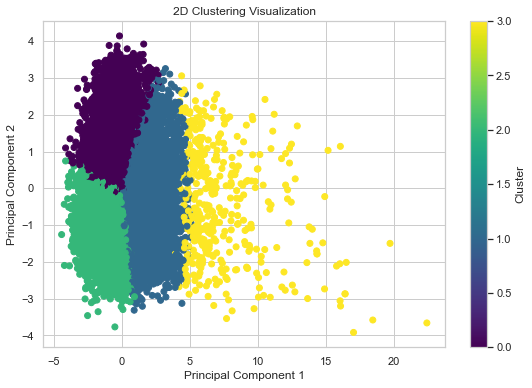

In [259]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  

df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary = cluster_summary.applymap(lambda x: None if x == 0 else round(x))

styled_cluster_summary = apply_table_style(cluster_summary.reset_index())
display(styled_cluster_summary)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(9, 6))  

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

**Cluster 0: Represents low-performing, budget-friendly players with lower wages and value**

**Cluster 1: Represents high-performing players with above-average ratings, high wages, and value**

**Cluster 2: Represents mid-range players with average ratings, value, and wages**

**Cluster 3: Represents elite players with top ratings, very high wages, and value**

**These clusters help us segment players into distinct groups based on their performance, wages, and market value, providing insights for player recruitment and team-building strategies!**

In [260]:
# df.to_csv('cleaned_fifa.csv', index=False)